In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style
sns.set_theme(style="whitegrid", palette="colorblind")


cat_file = '../data/codes/filtered-codes.tsv'
#cat_file = '../data/data-chiir2023-analysis/all-data.one-hot.tsv'

df = pd.read_csv(cat_file, index_col=False, sep='\t')
print(df.shape)
df.head(5)

(2160, 3)


,DOI,year,code
0,10.1145/3176349.3176875,2018,design;method;questionnaire
1,10.1145/3176349.3176875,2018,design;type;experimental
2,10.1145/3176349.3176875,2018,annotator;vivien
3,10.1145/3176349.3176875,2018,document;genre;domain-agnostic
4,10.1145/3020165.3022130,2017,design;method;content analysis


In [130]:
df[df.DOI == '10.1145/3406522.3446018']

,DOI,year,code
982,10.1145/3406522.3446018,2021,design;method;questionnaire
983,10.1145/3406522.3446018,2021,design;re-use
984,10.1145/3406522.3446018,2021,design;type;experimental
985,10.1145/3406522.3446018,2021,design;method;user study
986,10.1145/3406522.3446018,2021,annotator;mark
987,10.1145/3406522.3446018,2021,unknown


In [131]:
dimensions = [
    'design',
    'data',
    'infrastructure'
]

In [132]:
df['code_split'] = df.code.apply(lambda x: x.replace(' ', '_').split(';'))
df.code_split.apply(lambda x: x[0]).value_counts()

design            1121
annotator          356
document           237
task               138
application        101
data                66
research            52
user                47
infrastructure      38
unknown              4
Name: code_split, dtype: int64

# Publications per year

In [133]:
pubs_per_year = df[['DOI', 'year']].drop_duplicates().year.value_counts()
print('Total', pubs_per_year.sum())
pubs_per_year

Total 355


2020    64
2017    60
2018    51
2019    50
2016    49
2022    43
2021    38
Name: year, dtype: int64

# Design Codes

In [134]:
df[df.code.str.startswith('design')].code_split.apply(lambda x: x[1]).value_counts()

method    666
type      375
re-use     63
share      17
Name: code_split, dtype: int64

In [135]:
design_type = df[df.code.str.startswith('design;type;')].groupby('DOI').code.value_counts().unstack().fillna(0.0)
design_type = design_type.rename(columns={col: col.replace('design;type;', '') for col in design_type.columns})
design_type

code,experimental,resource paper,theoretical
DOI,,,
10.1145/2854946.2854957,1.0,0.0,0.0
10.1145/2854946.2854958,1.0,0.0,0.0
10.1145/2854946.2854959,1.0,1.0,0.0
10.1145/2854946.2854960,1.0,0.0,0.0
10.1145/2854946.2854961,1.0,0.0,0.0
...,...,...,...
10.1145/3498366.3505834,1.0,0.0,0.0
10.1145/3498366.3505835,1.0,1.0,0.0
10.1145/3498366.3505836,1.0,0.0,0.0


In [136]:
design_method = df[df.code.str.startswith('design;method;')].groupby('DOI').code.value_counts().unstack().fillna(0.0)
design_method = design_method.rename(columns={col: col.replace('design;method;', '') for col in design_method.columns})
design_method

code,CI,cluster analysis,cognitive work analysis,content analysis,controlled experiment,crawling,crowdsourcing,data analysis,data donation,data visualization,...,log analysis,network analysis,observation,questionnaire,screen recording,simulation,task analysis,think-aloud,user study,woz
DOI,,,,,,,,,,,,,,,,,,,,,
10.1145/2854946.2854957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/2854946.2854958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10.1145/2854946.2854960,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/2854946.2854961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1145/3498366.3505833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/3498366.3505835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/3498366.3505836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
method_cols = design_method.columns
method_cols

Index(['CI', 'cluster analysis', 'cognitive work analysis', 'content analysis',
       'controlled experiment', 'crawling', 'crowdsourcing', 'data analysis',
       'data donation', 'data visualization', 'diary study', 'ethnography',
       'evaluation', 'eye-tracking', 'factor analysis', 'interview',
       'literature review', 'log analysis', 'network analysis', 'observation',
       'questionnaire', 'screen recording', 'simulation', 'task analysis',
       'think-aloud', 'user study', 'woz'],
      dtype='object', name='code')

In [138]:
type_cols = design_type.columns
type_cols

Index(['experimental', 'resource paper', 'theoretical'], dtype='object', name='code')

In [139]:
df.columns

Index(['DOI', 'year', 'code', 'code_split'], dtype='object')

In [140]:
design = pd.concat([design_type, design_method], axis=1)
design['year'] = df[['DOI','year']].drop_duplicates().set_index('DOI')
design['year'] = design.year.astype(int)
design


code,experimental,resource paper,theoretical,CI,cluster analysis,cognitive work analysis,content analysis,controlled experiment,crawling,crowdsourcing,...,network analysis,observation,questionnaire,screen recording,simulation,task analysis,think-aloud,user study,woz,year
DOI,,,,,,,,,,,,,,,,,,,,,
10.1145/2854946.2854957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
10.1145/2854946.2854958,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016
10.1145/2854946.2854959,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2016
10.1145/2854946.2854960,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
10.1145/2854946.2854961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1145/3498366.3505834,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
10.1145/3498366.3505835,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
10.1145/3498366.3505836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022


In [141]:
design_year_frac = (design.groupby('year').sum().T / pubs_per_year).T
design_year_frac

code,experimental,resource paper,theoretical,CI,cluster analysis,cognitive work analysis,content analysis,controlled experiment,crawling,crowdsourcing,...,log analysis,network analysis,observation,questionnaire,screen recording,simulation,task analysis,think-aloud,user study,woz
2016,0.857143,0.163265,0.061224,0.000000,0.020408,0.00,0.040816,0.265306,0.020408,0.040816,...,0.285714,0.000000,0.061224,0.367347,0.061224,0.020408,0.000000,0.040816,0.224490,0.000000
2017,0.916667,0.116667,0.066667,0.000000,0.016667,0.00,0.183333,0.216667,0.033333,0.066667,...,0.200000,0.000000,0.083333,0.366667,0.016667,0.033333,0.016667,0.050000,0.133333,0.000000
2018,0.823529,0.117647,0.078431,0.019608,0.019608,0.00,0.117647,0.196078,0.039216,0.117647,...,0.215686,0.000000,0.039216,0.392157,0.078431,0.000000,0.000000,0.058824,0.196078,0.019608
2019,0.760000,0.240000,0.080000,0.000000,0.040000,0.02,0.040000,0.220000,0.100000,0.120000,...,0.100000,0.020000,0.000000,0.280000,0.020000,0.000000,0.000000,0.020000,0.240000,0.000000
2020,0.828125,0.078125,0.140625,0.000000,0.000000,0.00,0.171875,0.265625,0.015625,0.046875,...,0.187500,0.015625,0.109375,0.234375,0.015625,0.015625,0.000000,0.046875,0.218750,0.046875
2021,0.789474,0.078947,0.157895,0.000000,0.000000,0.00,0.210526,0.368421,0.026316,0.052632,...,0.184211,0.000000,0.052632,0.368421,0.000000,0.000000,0.000000,0.000000,0.236842,0.000000
2022,0.906977,0.069767,0.046512,0.000000,0.000000,0.00,0.232558,0.395349,0.000000,0.046512,...,0.279070,0.000000,0.000000,0.558140,0.000000,0.000000,0.000000,0.023256,0.139535,0.023256


In [142]:
#design_year_frac = design_year_frac.reset_index().rename(columns={'index': 'type'}).set_index('type')
#index={'code': 'type'}
#design_year_frac[type_cols]
design_year_frac.columns = design_year_frac.columns.rename('type')


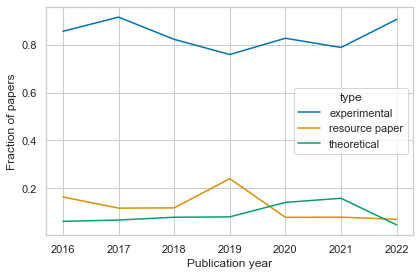

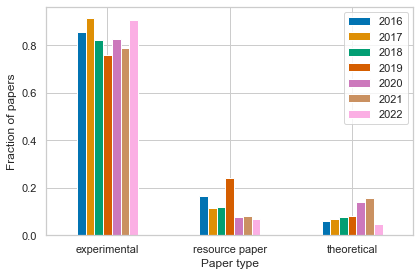

In [144]:
ax = design_year_frac[type_cols].plot(rot=0, stacked=False);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Publication year');
ax.figure.tight_layout();

ax.figure.savefig('../images/year-type.png', dpi=300)

ax = design_year_frac[type_cols].T.plot(kind='bar', rot=0);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Paper type');

ax.figure.tight_layout();

ax.figure.savefig('../images/year-type.png', dpi=300)



In [145]:
method_map = {method: method for method in method_cols}
method_map = {
    'CI': 'CI',
    'cluster analysis': 'cluster analysis',
    'cognitive work analysis': 'cogn. work analysis',
    'content analysis': 'content analysis',
    'controlled experiment': 'contr. exp.',
    'crawling': 'crawling',
    'crowdsourcing': 'crowdsourcing',
    'data analysis': 'data analysis',
    'data donation': 'data donation',
    'data visualization': 'data vis.',
    'diary study': 'diary study',
    'ethnography': 'ethnography',
    'evaluation': 'evaluation',
    'eye-tracking': 'eye-tracking',
    'factor analysis': 'factor analysis',
    'interview': 'interview',
    'literature review': 'lit. review',
    'log analysis': 'log analysis',
    'network analysis': 'network analysis',
    'observation': 'observation',
    'questionnaire': 'questionnaire',
    'screen recording': 'screen rec.',
    'simulation': 'simulation',
    'task analysis': 'task analysis',
    'think-aloud': 'think-aloud',
    'user study': 'user study',
    'woz': 'woz',
#    'all': 'all'
}

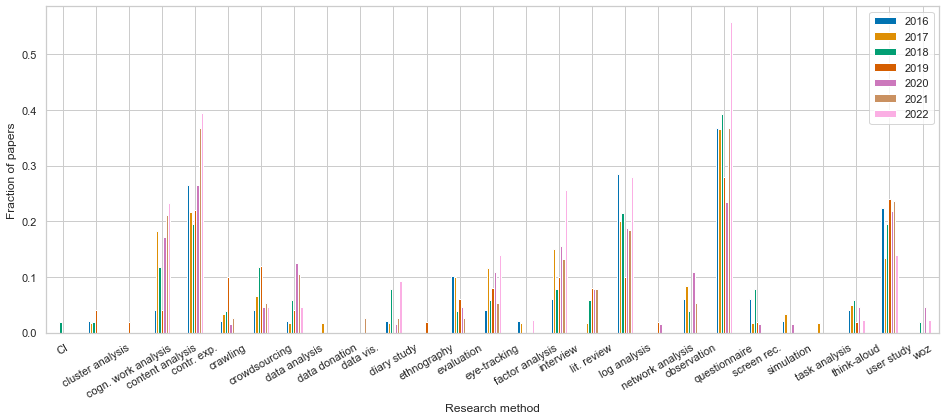

In [146]:
design_year_frac.rename(columns=method_map)
ax = design_year_frac.rename(columns=method_map)[method_map.values()].T.plot(kind='bar', rot=30);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Research method');
ax.figure.set_size_inches(16,6)

# Domain Codes

In [147]:
main_cat_cols = [
    'application',
    'document',
    'research',
    'task',
    'user'
]



In [148]:
domain_file = '../data/codes/domain_codes.tsv'

df['code_split'] = df.code.apply(lambda x: x.replace(' ', '_').split(';'))
domain_df = df[df.code_split.apply(lambda x: x[0] in main_cat_cols)]
domain_df.drop('code_split', axis=1).to_csv(domain_file, sep='\t', index=False)

In [149]:
df = pd.read_csv(domain_file, index_col=False, sep='\t')
df['code_split'] = df.code.apply(lambda x: x.replace(' ', '_').split(';'))
df['main_cat'] = df.code_split.apply(lambda x: x[0])
df['sub_cat'] = df.code_split.apply(lambda x: ':'.join(x[:2]))
df

,DOI,year,code,code_split,main_cat,sub_cat
0,10.1145/3176349.3176875,2018,document;genre;domain-agnostic,"[document, genre, domain-agnostic]",document,document:genre
1,10.1145/3020165.3022130,2017,task;work;research,"[task, work, research]",task,task:work
2,10.1145/3020165.3020178,2017,document;genre;Wikipedia,"[document, genre, Wikipedia]",document,document:genre
3,10.1145/2854946.2855001,2016,task;iir;search,"[task, iir, search]",task,task:iir
4,10.1145/2854946.2855001,2016,document;genre;medical,"[document, genre, medical]",document,document:genre
...,...,...,...,...,...,...
570,10.1145/3020165.3022126,2017,document;issue;multilinguality,"[document, issue, multilinguality]",document,document:issue
571,10.1145/3020165.3022126,2017,document;issue;CLIR,"[document, issue, CLIR]",document,document:issue
572,10.1145/3020165.3022126,2017,research;issue;CLIR,"[research, issue, CLIR]",research,research:issue
573,10.1145/3020165.3022125,2017,document;topic;health,"[document, topic, health]",document,document:topic


# Codes per paper

In [150]:
df.DOI.value_counts().describe()

count    354.000000
mean       1.624294
std        0.843289
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: DOI, dtype: float64

In [151]:
df.groupby(['DOI', 'year']).count().reset_index().groupby('year').code.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,49.0,1.938776,0.851669,1.0,1.0,2.0,3.0,4.0
2017,60.0,1.933333,0.799717,1.0,1.0,2.0,2.0,5.0
2018,51.0,1.725490,1.059782,1.0,1.0,1.0,2.0,5.0
2019,50.0,1.600000,0.903508,1.0,1.0,1.0,2.0,4.0
2020,64.0,1.468750,0.776004,1.0,1.0,1.0,2.0,4.0
2021,37.0,1.189189,0.461750,1.0,1.0,1.0,1.0,3.0
2022,43.0,1.348837,0.572535,1.0,1.0,1.0,2.0,3.0


# Main Category

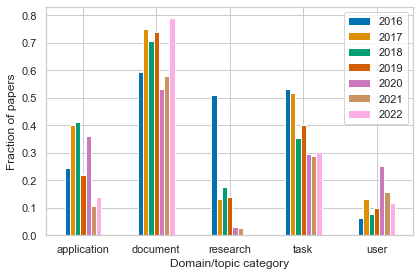

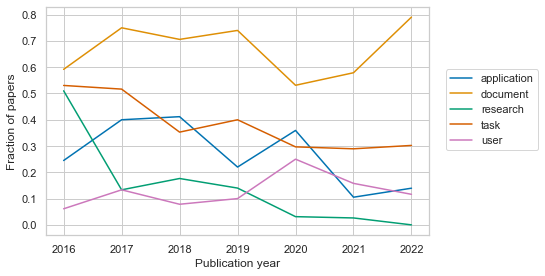

In [152]:
main_year_frac = df.groupby(['year', 'main_cat']).main_cat.count().unstack().fillna(0.0).T / pubs_per_year

ax = main_year_frac.plot(kind='bar', rot=0);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Domain/topic category');
ax.figure.tight_layout()
ax.figure.savefig('../images/year-main_cat-bar.png', dpi=300)


ax = main_year_frac.T.plot(kind='line', stacked=False, rot=0);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Publication year');
ax.figure.set_size_inches(8,4)
ax.legend(bbox_to_anchor=(0.5,0,0.8,0.75))
ax.figure.tight_layout()
ax.figure.savefig('../images/year-main_cat-line.png', dpi=300)



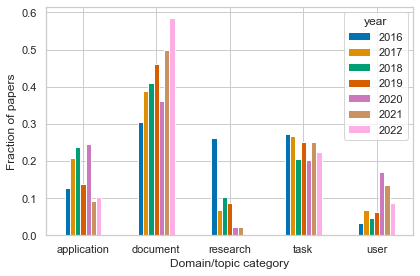

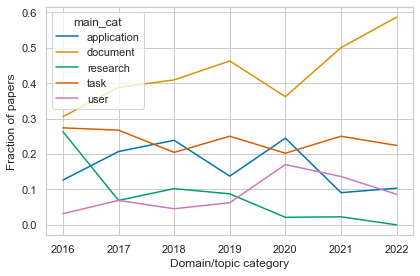

In [153]:
main_year = df.groupby(['year', 'main_cat']).main_cat.count().unstack().fillna(0.0).T
main_year_frac = main_year / main_year.sum()
main_year_frac
ax = main_year_frac.plot(kind='bar', rot=0);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Domain/topic category');
ax.figure.tight_layout()
ax.figure.savefig('../images/year-main_cat.png', dpi=300)


#ax = main_year_frac.T.plot(kind='area', stacked=True, rot=0);
ax = main_year_frac.T.plot(kind='line', stacked=False, rot=0);

ax.set_ylabel('Fraction of papers');
ax.set_xlabel('Domain/topic category');
ax.figure.tight_layout()
ax.figure.savefig('../images/year-main_cat.png', dpi=300)



In [154]:
g_main = df.groupby('DOI').main_cat.value_counts().unstack().fillna(0.0)
g_main = g_main.apply(lambda row: [1.0 if x > 1.0 else x for x in row])
pd.concat([g_main.sum(), g_main.sum() / len(g_main)], axis=1)

,0,1
main_cat,,
application,93.0,0.262712
document,207.0,0.584746
research,47.0,0.132768
task,118.0,0.333333
user,40.0,0.112994


In [155]:
g_main.T.dot(g_main) / len(g_main)

main_cat,application,document,research,task,user
main_cat,,,,,
application,0.262712,0.110169,0.031073,0.042373,0.025424
document,0.110169,0.584746,0.056497,0.127119,0.042373
research,0.031073,0.056497,0.132768,0.033898,0.014124
task,0.042373,0.127119,0.033898,0.333333,0.031073
user,0.025424,0.042373,0.014124,0.031073,0.112994


In [156]:
g_main.T.dot(g_main) / g_main.sum()

main_cat,application,document,research,task,user
main_cat,,,,,
application,1.000000,0.188406,0.234043,0.127119,0.225
document,0.419355,1.000000,0.425532,0.381356,0.375
research,0.118280,0.096618,1.000000,0.101695,0.125
task,0.161290,0.217391,0.255319,1.000000,0.275
user,0.096774,0.072464,0.106383,0.093220,1.000


In [157]:
df[df.DOI == '10.1145/3498366.3505834']

,DOI,year,code,code_split,main_cat,sub_cat
144,10.1145/3498366.3505834,2022,document;genre;news,"[document, genre, news]",document,document:genre
145,10.1145/3498366.3505834,2022,document;genre;Wikipedia,"[document, genre, Wikipedia]",document,document:genre


# Paper type and domains

In [158]:
type_main = pd.concat([design_type, g_main], axis=1).fillna(0.0)
type_main


,experimental,resource paper,theoretical,application,document,research,task,user
DOI,,,,,,,,
10.1145/2854946.2854957,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
10.1145/2854946.2854958,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10.1145/2854946.2854959,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10.1145/2854946.2854960,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10.1145/2854946.2854961,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10.1145/3498366.3505834,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10.1145/3498366.3505835,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10.1145/3498366.3505836,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
s_type = type_main[type_cols].sum()
s_type # / s_type.sum()

experimental      299.0
resource paper     44.0
theoretical        32.0
dtype: float64

In [160]:
s_main = type_main[main_cat_cols].sum()
s_main

application     93.0
document       207.0
research        47.0
task           118.0
user            40.0
dtype: float64

In [161]:
type_main[type_cols].T.dot(type_main[main_cat_cols])


,application,document,research,task,user
experimental,85.0,172.0,38.0,99.0,37.0
resource paper,9.0,33.0,4.0,15.0,0.0
theoretical,3.0,14.0,7.0,15.0,5.0


In [162]:
type_main_frac = (type_main[type_cols].T.dot(type_main[main_cat_cols]).T / s_type).T
type_main_frac.loc['all'] = s_main / len(type_main)
type_main_frac

,application,document,research,task,user
experimental,0.284281,0.575251,0.127090,0.331104,0.123746
resource paper,0.204545,0.750000,0.090909,0.340909,0.000000
theoretical,0.093750,0.437500,0.218750,0.468750,0.156250
all,0.261972,0.583099,0.132394,0.332394,0.112676


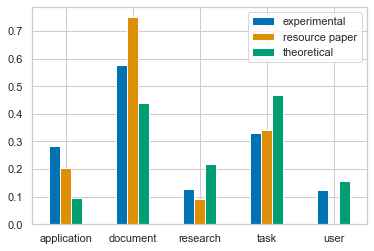

In [163]:
type_main_frac.T.drop('all', axis=1).plot(kind='bar', rot=0);

IIR papers focus most on aspects of documents, tasks and applications.

_Resource_ papers focus more on document aspects than _experimental_ and _theoretical_ papers.

_Theoretical_ tend to focus more on general IIR research issues and on tasks.

Compared to _resource_ and _theoretical_ papers, _experimental_ papers more frequently focus on applications.


In [164]:
type_main[type_cols].T.dot(type_main[main_cat_cols]) / s_main

,application,document,research,task,user
experimental,0.913978,0.830918,0.808511,0.838983,0.925
resource paper,0.096774,0.159420,0.085106,0.127119,0.000
theoretical,0.032258,0.067633,0.148936,0.127119,0.125


# Sub Category

In [165]:
sub_cat_cols = df.sub_cat.unique()

In [166]:
df.sub_cat.value_counts()

document:genre            129
task:work                  76
application:technology     71
document:topic             59
task:iir                   40
document:type              40
research:IIR               33
user:issue                 33
task:context               22
application:feature        17
user:group                 14
application:device         12
research:issue             11
document:issue              9
research:process            8
application:food            1
Name: sub_cat, dtype: int64

In [167]:
g_sub = df.groupby('DOI').sub_cat.value_counts().unstack().fillna(0.0)
g_sub = g_sub.apply(lambda row: [1.0 if x > 1.0 else x for x in row])
pd.concat([g_sub.sum(), g_sub.sum() / len(g_sub)], axis=1)

,0,1
sub_cat,,
application:device,12.0,0.033898
application:feature,16.0,0.045198
application:food,1.0,0.002825
application:technology,70.0,0.197740
document:genre,120.0,0.338983
document:issue,8.0,0.022599
document:topic,57.0,0.161017
document:type,39.0,0.110169
research:IIR,33.0,0.093220


In [168]:
type_sub = pd.concat([design_type, g_sub], axis=1).fillna(0.0)
type_sub


,experimental,resource paper,theoretical,application:device,application:feature,application:food,application:technology,document:genre,document:issue,document:topic,document:type,research:IIR,research:issue,research:process,task:context,task:iir,task:work,user:group,user:issue
DOI,,,,,,,,,,,,,,,,,,,
10.1145/2854946.2854957,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/2854946.2854958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10.1145/2854946.2854959,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854961,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1145/3498366.3505834,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1145/3498366.3505835,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/3498366.3505836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [169]:
s_type = type_sub[type_cols].sum()
s_type # / s_type.sum()

experimental      299.0
resource paper     44.0
theoretical        32.0
dtype: float64

In [170]:
s_sub = type_sub[sub_cat_cols].sum()
s_sub

document:genre            120.0
task:work                  67.0
task:iir                   39.0
document:type              39.0
task:context               22.0
document:topic             57.0
document:issue              8.0
research:IIR               33.0
application:technology     70.0
application:feature        16.0
application:device         12.0
research:process            7.0
research:issue             11.0
user:issue                 32.0
user:group                 14.0
application:food            1.0
dtype: float64

In [171]:
type_sub[type_cols].T.dot(type_sub[sub_cat_cols])


,document:genre,task:work,task:iir,document:type,task:context,document:topic,document:issue,research:IIR,application:technology,application:feature,application:device,research:process,research:issue,user:issue,user:group,application:food
experimental,96.0,57.0,34.0,32.0,18.0,51.0,8.0,26.0,64.0,15.0,11.0,5.0,9.0,29.0,13.0,1.0
resource paper,20.0,7.0,7.0,7.0,1.0,8.0,0.0,2.0,7.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
theoretical,9.0,8.0,4.0,4.0,3.0,1.0,0.0,6.0,2.0,1.0,0.0,1.0,2.0,5.0,3.0,0.0


In [172]:
type_sub_frac = (type_sub[type_cols].T.dot(type_sub[sub_cat_cols]).T / s_type).T
type_sub_frac.loc['all'] = s_sub / len(type_sub)
type_sub_frac

,document:genre,task:work,task:iir,document:type,task:context,document:topic,document:issue,research:IIR,application:technology,application:feature,application:device,research:process,research:issue,user:issue,user:group,application:food
experimental,0.321070,0.190635,0.113712,0.107023,0.060201,0.170569,0.026756,0.086957,0.214047,0.050167,0.036789,0.016722,0.030100,0.096990,0.043478,0.003344
resource paper,0.454545,0.159091,0.159091,0.159091,0.022727,0.181818,0.000000,0.045455,0.159091,0.022727,0.022727,0.022727,0.022727,0.000000,0.000000,0.000000
theoretical,0.281250,0.250000,0.125000,0.125000,0.093750,0.031250,0.000000,0.187500,0.062500,0.031250,0.000000,0.031250,0.062500,0.156250,0.093750,0.000000
all,0.338028,0.188732,0.109859,0.109859,0.061972,0.160563,0.022535,0.092958,0.197183,0.045070,0.033803,0.019718,0.030986,0.090141,0.039437,0.002817


In [173]:
type_sub_frac[sorted(type_sub_frac.columns)]

,application:device,application:feature,application:food,application:technology,document:genre,document:issue,document:topic,document:type,research:IIR,research:issue,research:process,task:context,task:iir,task:work,user:group,user:issue
experimental,0.036789,0.050167,0.003344,0.214047,0.321070,0.026756,0.170569,0.107023,0.086957,0.030100,0.016722,0.060201,0.113712,0.190635,0.043478,0.096990
resource paper,0.022727,0.022727,0.000000,0.159091,0.454545,0.000000,0.181818,0.159091,0.045455,0.022727,0.022727,0.022727,0.159091,0.159091,0.000000,0.000000
theoretical,0.000000,0.031250,0.000000,0.062500,0.281250,0.000000,0.031250,0.125000,0.187500,0.062500,0.031250,0.093750,0.125000,0.250000,0.093750,0.156250
all,0.033803,0.045070,0.002817,0.197183,0.338028,0.022535,0.160563,0.109859,0.092958,0.030986,0.019718,0.061972,0.109859,0.188732,0.039437,0.090141


IIR papers focus most on aspects of documents, tasks and applications.

_Resource_ papers focus more on document aspects than _experimental_ and _theoretical_ papers.

_Theoretical_ tend to focus more on general IIR research issues and on tasks.

Compared to _resource_ and _theoretical_ papers, _experimental_ papers more frequently focus on applications.


# Methods and domain

In [174]:
method_main = pd.concat([design_method, g_main], axis=1).fillna(0.0)
method_main


,CI,cluster analysis,cognitive work analysis,content analysis,controlled experiment,crawling,crowdsourcing,data analysis,data donation,data visualization,...,simulation,task analysis,think-aloud,user study,woz,application,document,research,task,user
DOI,,,,,,,,,,,,,,,,,,,,,
10.1145/2854946.2854957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
10.1145/2854946.2854958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10.1145/2854946.2854959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10.1145/2854946.2854960,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10.1145/2854946.2854961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1145/3406522.3446055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10.1145/3406522.3446056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10.1145/3498366.3505816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [175]:
s_method = method_main[method_cols].sum()
s_method # / s_method.sum()

CI                           1.0
cluster analysis             5.0
cognitive work analysis      1.0
content analysis            50.0
controlled experiment       95.0
crawling                    12.0
crowdsourcing               25.0
data analysis               21.0
data donation                1.0
data visualization           1.0
diary study                 12.0
ethnography                  1.0
evaluation                  20.0
eye-tracking                31.0
factor analysis              3.0
interview                   47.0
literature review           16.0
log analysis                73.0
network analysis             2.0
observation                 19.0
questionnaire              127.0
screen recording            10.0
simulation                   4.0
task analysis                1.0
think-aloud                 13.0
user study                  70.0
woz                          5.0
dtype: float64

In [176]:
method_main[method_cols].sum(axis=1).describe()

count    355.000000
mean       1.876056
std        1.177168
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64

In [177]:
for design_type in type_cols:
    print(design_type)
    print(design[design[design_type] == 1][method_cols].sum(axis=1).describe())

experimental
count    299.000000
mean       2.086957
std        1.116892
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64
resource paper
count    44.000000
mean      1.181818
std       1.206045
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000
dtype: float64
theoretical
count    32.000000
mean      0.968750
std       0.897465
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       4.000000
dtype: float64


In [178]:
s_main = method_main[main_cat_cols].sum()
s_main

application     93.0
document       207.0
research        47.0
task           118.0
user            40.0
dtype: float64

In [179]:
s_main

application     93.0
document       207.0
research        47.0
task           118.0
user            40.0
dtype: float64

In [180]:
method_dot_main = method_main[method_cols].T.dot(method_main[main_cat_cols])
method_dot_main.loc['all'] = s_main
method_dot_main['all'] = s_method
method_dot_main.loc['all']['all'] = len(method_main)
method_dot_main

,application,document,research,task,user,all
CI,1.0,1.0,0.0,0.0,0.0,1.0
cluster analysis,2.0,3.0,0.0,2.0,0.0,5.0
cognitive work analysis,0.0,1.0,0.0,1.0,0.0,1.0
content analysis,8.0,31.0,2.0,15.0,7.0,50.0
controlled experiment,24.0,65.0,13.0,25.0,13.0,95.0
crawling,6.0,9.0,1.0,4.0,2.0,12.0
crowdsourcing,8.0,17.0,3.0,5.0,1.0,25.0
data analysis,4.0,11.0,2.0,4.0,1.0,21.0
data donation,0.0,1.0,0.0,0.0,0.0,1.0
data visualization,0.0,1.0,0.0,0.0,0.0,1.0


In [181]:
method_dot_main / method_dot_main.T['all']

,application,document,research,task,user,all
CI,0.010753,0.004831,0.000000,0.000000,0.000,0.002817
cluster analysis,0.021505,0.014493,0.000000,0.016949,0.000,0.014085
cognitive work analysis,0.000000,0.004831,0.000000,0.008475,0.000,0.002817
content analysis,0.086022,0.149758,0.042553,0.127119,0.175,0.140845
controlled experiment,0.258065,0.314010,0.276596,0.211864,0.325,0.267606
crawling,0.064516,0.043478,0.021277,0.033898,0.050,0.033803
crowdsourcing,0.086022,0.082126,0.063830,0.042373,0.025,0.070423
data analysis,0.043011,0.053140,0.042553,0.033898,0.025,0.059155
data donation,0.000000,0.004831,0.000000,0.000000,0.000,0.002817
data visualization,0.000000,0.004831,0.000000,0.000000,0.000,0.002817


In [182]:
method_main_frac = (method_main[method_cols].T.dot(method_main[main_cat_cols]).T / s_method).T
method_main_frac.loc['all'] = s_main / len(method_main)
method_main_frac['all'] = s_method
method_main_frac.loc['all']['all'] = len(method_main)

method_main_frac[method_main_frac['all'] >= 10].sort_values('all', ascending=False)

,application,document,research,task,user,all
all,0.261972,0.583099,0.132394,0.332394,0.112676,355.0
questionnaire,0.275591,0.598425,0.094488,0.291339,0.110236,127.0
controlled experiment,0.252632,0.684211,0.136842,0.263158,0.136842,95.0
log analysis,0.219178,0.561644,0.178082,0.397260,0.123288,73.0
user study,0.300000,0.614286,0.085714,0.285714,0.042857,70.0
content analysis,0.160000,0.620000,0.040000,0.300000,0.140000,50.0
interview,0.085106,0.595745,0.063830,0.446809,0.212766,47.0
eye-tracking,0.322581,0.709677,0.193548,0.064516,0.096774,31.0
crowdsourcing,0.320000,0.680000,0.120000,0.200000,0.040000,25.0
data analysis,0.190476,0.523810,0.095238,0.190476,0.047619,21.0


In [183]:
method_main_frac.index = method_map.values()
method_main_frac

ValueError: Length mismatch: Expected axis has 28 elements, new values have 27 elements

In [184]:
abs(method_main_frac - method_main_frac.T['all']) / method_main_frac.T['all']

,application,document,research,task,user,all
CI,2.817204,0.714976,1.000000,1.000000,1.000000,0.997183
cluster analysis,0.526882,0.028986,1.000000,0.203390,1.000000,0.985915
cognitive work analysis,1.000000,0.714976,1.000000,2.008475,1.000000,0.997183
content analysis,0.389247,0.063285,0.697872,0.097458,0.242500,0.859155
controlled experiment,0.035654,0.173405,0.033595,0.208296,0.214474,0.732394
crawling,0.908602,0.286232,0.370567,0.002825,0.479167,0.966197
crowdsourcing,0.221505,0.166184,0.093617,0.398305,0.645000,0.929577
data analysis,0.272913,0.101679,0.280648,0.426957,0.577381,0.940845
data donation,1.000000,0.714976,1.000000,1.000000,1.000000,0.997183
data visualization,1.000000,0.714976,1.000000,1.000000,1.000000,0.997183


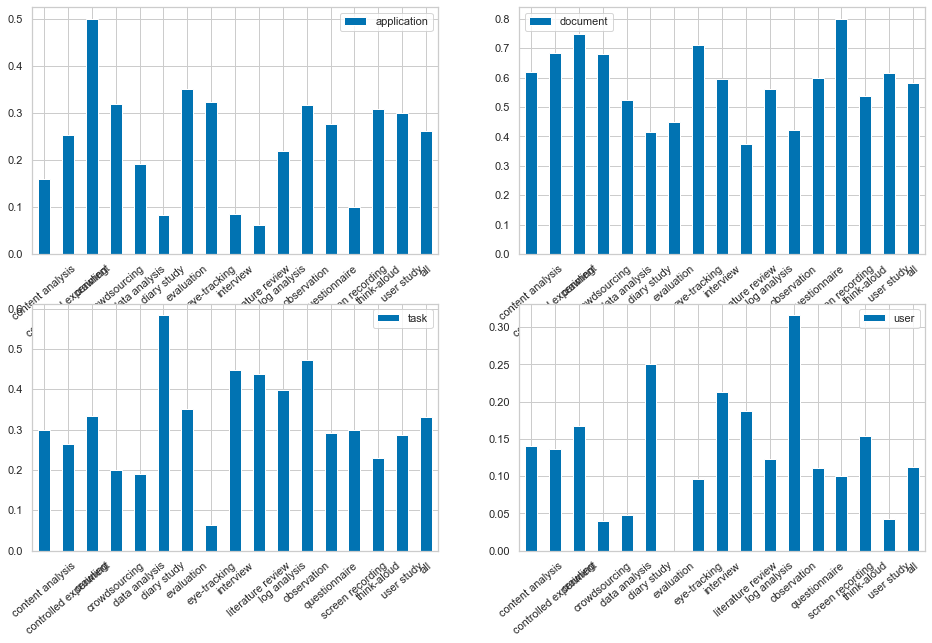

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

rot = 40
fig, ax = plt.subplots(2, 2)

method_main_frac[method_main_frac['all'] >= 10][['application']].plot(kind='bar', rot=rot, ax=ax[0][0]);

method_main_frac[method_main_frac['all'] >= 10][['document']].plot(kind='bar', rot=rot, ax=ax[0][1]);

method_main_frac[method_main_frac['all'] >= 10][['task']].plot(kind='bar', rot=rot, ax=ax[1][0]);

method_main_frac[method_main_frac['all'] >= 10][['user']].plot(kind='bar', rot=rot, ax=ax[1][1]);

fig.set_size_inches(16,10)

#sns.catplot(data=method_main_frac[method_main_frac['all'] >= 10], x="application", kind="bar")

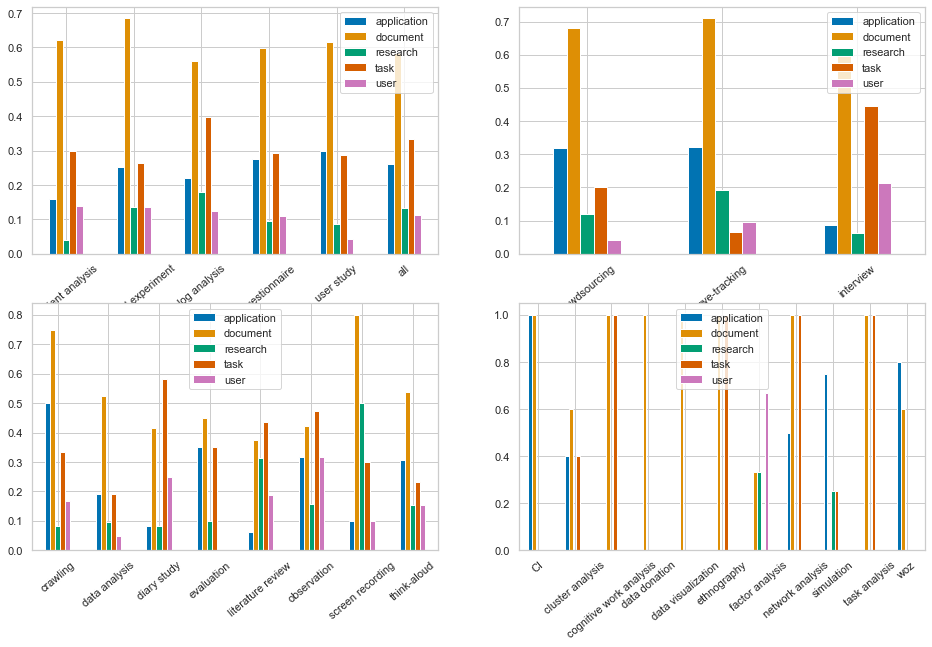

In [186]:
rot = 40
fig, ax = plt.subplots(2, 2)

method_main_frac[method_main_frac['all'] >= 50].drop('all', axis=1).plot(kind='bar', rot=rot, ax=ax[0][0]);

method_main_frac[(method_main_frac['all'] < 50) & (method_main_frac['all'] >= 25)].drop('all', axis=1).plot(kind='bar', rot=rot, ax=ax[0][1]);

method_main_frac[(method_main_frac['all'] < 25) & (method_main_frac['all'] >= 10)].drop('all', axis=1).plot(kind='bar', rot=rot, ax=ax[1][0]);

method_main_frac[method_main_frac['all'] < 10].drop('all', axis=1).plot(kind='bar', rot=rot, ax=ax[1][1]);

fig.set_size_inches(16,10)

#sns.catplot(data=method_main_frac[method_main_frac['all'] >= 10], x="application", kind="bar")

**Notes**:

- _eye-tracking_ studies are rarely used task-focused papers.
- _evaluations_ are never used in user-focused papers.
- _diary studies_ are rarely used for application-focused papers and very often for task-focused papers.

In [187]:
s = method_main[method_cols].sum()
common_methods = s[s >= 10].index

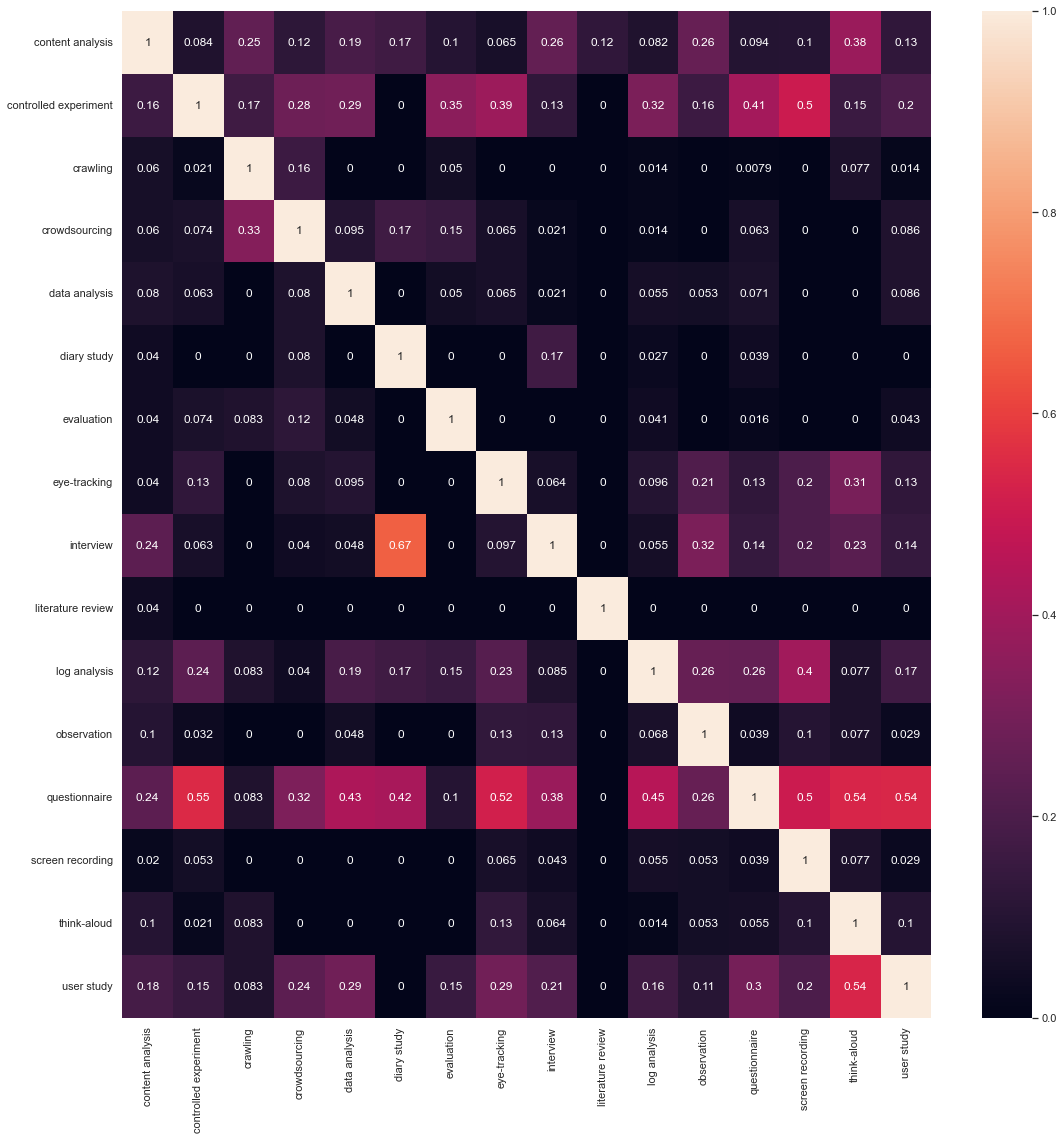

In [188]:
method_cooc = method_main[common_methods].T.dot(method_main[common_methods])
method_cooc / method_cooc.max()
ax = sns.heatmap(method_cooc / method_cooc.max(), annot=True);

ax.figure.set_size_inches(16,16);

ax.figure.tight_layout()
ax.figure.savefig('../images/method-cooccurence.png', dpi=300)

# Methods and Type

In [255]:
method_type = pd.concat([design_method, design_type], axis=1).fillna(0.0)
method_type


code,CI,cluster analysis,cognitive work analysis,content analysis,controlled experiment,crawling,crowdsourcing,data analysis,data donation,data visualization,...,questionnaire,screen recording,simulation,task analysis,think-aloud,user study,woz,experimental,resource paper,theoretical
DOI,,,,,,,,,,,,,,,,,,,,,
10.1145/2854946.2854957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
10.1145/2854946.2854960,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10.1145/2854946.2854961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1145/3406522.3446055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10.1145/3406522.3446056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10.1145/3498366.3505816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
s_method = method_type[method_cols].sum()
s_method # / s_method.sum()

code
CI                           1.0
cluster analysis             5.0
cognitive work analysis      1.0
content analysis            50.0
controlled experiment       95.0
crawling                    12.0
crowdsourcing               25.0
data analysis               21.0
data donation                1.0
data visualization           1.0
diary study                 12.0
ethnography                  1.0
evaluation                  20.0
eye-tracking                31.0
factor analysis              3.0
interview                   47.0
literature review           16.0
log analysis                73.0
network analysis             2.0
observation                 19.0
questionnaire              127.0
screen recording            10.0
simulation                   4.0
task analysis                1.0
think-aloud                 13.0
user study                  70.0
woz                          5.0
dtype: float64

In [257]:
s_main = method_type[type_cols].sum()
s_main

code
experimental      299.0
resource paper     44.0
theoretical        32.0
dtype: float64

In [258]:
method_type[method_cols].T.dot(method_type[type_cols])


code,experimental,resource paper,theoretical
code,,,
CI,1.0,0.0,0.0
cluster analysis,4.0,1.0,0.0
cognitive work analysis,1.0,0.0,0.0
content analysis,43.0,3.0,4.0
controlled experiment,95.0,6.0,0.0
crawling,12.0,3.0,0.0
crowdsourcing,25.0,2.0,0.0
data analysis,21.0,0.0,1.0
data donation,1.0,0.0,0.0


In [259]:
method_type_frac = (method_type[method_cols].T.dot(method_type[type_cols]).T / s_method).T
method_type_frac.loc['all'] = s_main / len(method_type)
method_type_frac['all'] = s_method
method_type_frac.loc['all']['all'] = len(method_type)

method_type_frac[method_type_frac['all'] >= 10].sort_values('all', ascending=False)

code,experimental,resource paper,theoretical,all
code,,,,
all,0.842254,0.123944,0.090141,355.0
questionnaire,0.984252,0.062992,0.007874,127.0
controlled experiment,1.000000,0.063158,0.000000,95.0
log analysis,0.958904,0.095890,0.027397,73.0
user study,0.928571,0.114286,0.014286,70.0
content analysis,0.860000,0.060000,0.080000,50.0
interview,0.978723,0.042553,0.063830,47.0
eye-tracking,0.935484,0.129032,0.000000,31.0
crowdsourcing,1.000000,0.080000,0.000000,25.0


IIR papers focus most on aspects of documents, tasks and applications.

_Resource_ papers focus more on document aspects than _experimental_ and _theoretical_ papers.

_Theoretical_ tend to focus more on general IIR research issues and on tasks.

Compared to _resource_ and _theoretical_ papers, _experimental_ papers more frequently focus on applications.


In [191]:
temp_df[method_cols].T.dot(temp_df[main_cat_cols]) / s_main

,application,document,research,task,user
CI,0.010753,0.004831,0.000000,0.000000,0.000
cluster analysis,0.021505,0.014493,0.000000,0.016949,0.000
cognitive work analysis,0.000000,0.004831,0.000000,0.008475,0.000
content analysis,0.086022,0.149758,0.042553,0.127119,0.175
controlled experiment,0.258065,0.314010,0.276596,0.211864,0.325
crawling,0.064516,0.043478,0.021277,0.033898,0.050
crowdsourcing,0.086022,0.082126,0.063830,0.042373,0.025
data analysis,0.043011,0.053140,0.042553,0.033898,0.025
data donation,0.000000,0.004831,0.000000,0.000000,0.000
data visualization,0.000000,0.004831,0.000000,0.000000,0.000
